<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Bixi_logo.svg" alt="Drawing" align="left" style="width: 800px;"/>

# [bIXI Montreal](https://montreal.bixi.com) - Data Preprocessing, Viualization and Analysis


This notebook icludes a series of exploratory data analysis and modeling of [the open data](https://montreal.bixi.com/en/open-data) from BIXI Montreal bike sharing system. The goal of this project includes:

 * Visualizing the bike sharing data
 * Finding some interesting observations and insights behind the data/ bike use trends.

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os
from datetime import datetime

%matplotlib inline

## I. Data Preprocessing

### Weather information

I think weather is an important external information that has a huge influence on the usage of bicycle in Montreal. For this project, I am using the weather information data I scrapped using my [previous project](https://github.com/mn9891/weather-scrap-selenium/blob/master/Weather_data_mtl_from_weather_gc_ca.ipynb). 

In [2]:
weather2014 = pd.read_csv('Weather_Data/raw/yearly/weather2014.csv')
weather2015 = pd.read_csv('Weather_Data/raw/yearly/weather2015.csv')
weather2016 = pd.read_csv('Weather_Data/raw/yearly/weather2016.csv')
weather2017 = pd.read_csv('Weather_Data/raw/yearly/weather2017.csv')
weather2018 = pd.read_csv('Weather_Data/raw/yearly/weather2018.csv')

In [3]:
weather2018.tail()

,Date/Time,Year,Month,Day,Hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Weather
5827,2018-08-31 19:00:00,2018,8,31,19,22.6,13.2,55.0,8.0,14.0,24.1,101.88,26.0,Mostly Cloudy
5828,2018-08-31 20:00:00,2018,8,31,20,21.8,12.6,55.0,8.0,14.0,24.1,101.89,NaN,NaN
5829,2018-08-31 21:00:00,2018,8,31,21,21.6,12.2,55.0,8.0,14.0,24.1,101.90,NaN,NaN
5830,2018-08-31 22:00:00,2018,8,31,22,21.8,13.9,60.0,11.0,13.0,24.1,101.89,25.0,Mostly Cloudy
5831,2018-08-31 23:00:00,2018,8,31,23,21.1,16.4,74.0,19.0,25.0,24.1,101.93,26.0,NaN


### Merging the monthly trips into yearly files


The open data available [here](https://montreal.bixi.com/en/open-data) from Bixi website has a monthly format. Here I'm combining them into years

In [4]:
# %%time
trips2014 = pd.read_csv('Movements_History_Data/2014/OD_2014-04.csv')
for m in range(5,10):
    aux = pd.read_csv('Movements_History_Data/2014/OD_2014-0'+ str(m)+'.csv')
    trips2014 = trips2014.append(aux,ignore_index=True)
for m in range(10,12):
    aux = pd.read_csv('Movements_History_Data/2014/OD_2014-'+ str(m)+'.csv')
    trips2014 = trips2014.append(aux,ignore_index=True)
trips2014.to_csv('Movements_History_Data/2014/trips2014.csv',index=False)
    
trips2015 = pd.read_csv('Movements_History_Data/2015/OD_2015-04.csv')
for m in range(5,10):
    aux = pd.read_csv('Movements_History_Data/2015/OD_2015-0'+ str(m)+'.csv')
    trips2015 = trips2015.append(aux,ignore_index=True)
for m in range(10,12):
    aux = pd.read_csv('Movements_History_Data/2015/OD_2015-'+ str(m)+'.csv')
    trips2015 = trips2015.append(aux,ignore_index=True)
trips2015.to_csv('Movements_History_Data/2015/trips2015.csv',index=False)

    
trips2016 = pd.read_csv('Movements_History_Data/2016/OD_2016-04.csv')
for m in range(5,10):
    aux = pd.read_csv('Movements_History_Data/2016/OD_2016-0'+ str(m)+'.csv')
    trips2016 = trips2016.append(aux,ignore_index=True)
for m in range(10,12):
    aux = pd.read_csv('Movements_History_Data/2016/OD_2016-'+ str(m)+'.csv')
    trips2016 = trips2016.append(aux,ignore_index=True)
trips2016.to_csv('Movements_History_Data/2016/trips2016.csv',index=False)
    
trips2017 = pd.read_csv('Movements_History_Data/2017/OD_2017-04.csv')
for m in range(5,10):
    aux = pd.read_csv('Movements_History_Data/2017/OD_2017-0'+ str(m)+'.csv')
    trips2017 = trips2017.append(aux,ignore_index=True)
for m in range(10,12):
    aux = pd.read_csv('Movements_History_Data/2017/OD_2017-'+ str(m)+'.csv')
    trips2017 = trips2017.append(aux,ignore_index=True)
trips2017.to_csv('Movements_History_Data/2017/trips2017.csv',index=False)
    
trips2018 = pd.read_csv('Movements_History_Data/2018/OD_2018-04.csv')
for m in range(5,9):
    aux = pd.read_csv('Movements_History_Data/2018/OD_2018-0'+ str(m)+'.csv')
    trips2018 = trips2018.append(aux,ignore_index=True)
trips2018.to_csv('Movements_History_Data/2018/trips2018.csv',index=False)


I also saved the resulting files to avoid re-running that. Now just load them saving a minute or two

In [5]:
trips2014 = pd.read_csv('Movements_History_Data/2014/trips2014.csv')
trips2015 = pd.read_csv('Movements_History_Data/2015/trips2015.csv')
trips2016 = pd.read_csv('Movements_History_Data/2016/trips2016.csv')
trips2017 = pd.read_csv('Movements_History_Data/2017/trips2017.csv')
trips2018 = pd.read_csv('Movements_History_Data/2018/trips2018.csv')

In [6]:
trips2017.tail()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
4740352,2017-11-15 23:57,6182,2017-11-16 00:11,6159,840,0
4740353,2017-11-15 23:58,6013,2017-11-16 00:04,6023,363,1
4740354,2017-11-15 23:58,6128,2017-11-16 00:15,6411,1014,1
4740355,2017-11-15 23:58,6748,2017-11-16 00:27,6349,1752,1
4740356,2017-11-15 23:59,6112,2017-11-16 00:06,6173,460,1


Stations names, codes and locations are also provided in [the open data](https://montreal.bixi.com/en/open-data) section of bixi website. Let's load them

In [23]:
station2014 = pd.read_csv('Movements_History_Data/2014/Stations_2014.csv')
station2015 = pd.read_csv('Movements_History_Data/2015/Stations_2015.csv')
station2016 = pd.read_csv('Movements_History_Data/2016/Stations_2016.csv')
station2017 = pd.read_csv('Movements_History_Data/2017/Stations_2017.csv')
station2018 = pd.read_csv('Movements_History_Data/2018/Stations_2018.csv')

In [8]:
station2018.tail()

,code,name,latitude,longitude
547,7014,Métro Université de Montréal,45.503640,-73.618290
548,6928,Jean-Brillant / McKenna,45.498767,-73.618870
549,6084,Duke / Brennan,45.495581,-73.553711
550,7082,Métro Lionel-Groulx (Atwater / Lionel-Groulx),45.482941,-73.579742
551,7034,Atwater / Greene,45.480495,-73.577827


### Combine trips, stations, and weather data

In [9]:
def merge(trip, station, weather):
    """ function to merge trip, station, and weather information """

    # merge trip with station information
    aux1 = pd.merge(left=trip, right=station, how='left',
                          left_on='start_station_code', right_on='code')
    trip_station = pd.merge(left=aux1, right=station, how='left',
                            left_on='end_station_code', right_on='code',
                            suffixes=('_start', '_end'))

    columns = [ 'start_date', 'end_date',
               'duration_sec', 'start_station_code', 'name_start',
               'latitude_start', 'longitude_start',
               'end_station_code', 'name_end', 'latitude_end',
               'longitude_end','is_member']
    trip_station = trip_station[columns]


    # extract trip year, month, day, hour information
    trip_date = np.array(list(map(lambda x: (x.year, x.month, x.day, x.hour),
                                   trip_station['start_date'].apply(lambda z: datetime.strptime(z, '%Y-%m-%d %H:%M')))))
    trip_station['Year'] = trip_date[:, 0]
    trip_station['Month'] = trip_date[:, 1]
    trip_station['Day'] = trip_date[:, 2]
    trip_station['Hour'] = trip_date[:, 3]

    # merge trip with weather information
    merged = pd.merge(left=trip_station, right=weather,
                      on=['Year','Month', 'Day', 'Hour'], how='inner')
    merged = merged[['start_date', 'end_date','duration_sec', 'start_station_code', 'name_start', 
                     'latitude_start', 'longitude_start', 'end_station_code', 'name_end', 'latitude_end', 
                     'longitude_end','Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
                     'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Weather']]

    return merged

In [10]:
%%time
merged2014 = merge(trips2014, station2014, weather2014)
merged2015 = merge(trips2015, station2015, weather2015)
merged2016 = merge(trips2016, station2016, weather2016)
merged2017 = merge(trips2017, station2017, weather2017)
merged2018 = merge(trips2018, station2018, weather2018)
# concatenate and save the merged data
data = pd.concat([merged2014, merged2015, merged2016, merged2017, merged2018], axis=0)
# data.to_csv('./merged_data/all_data.csv', index=False)

Wall time: 5min 10s


#### Clean the data

Here I am extracting year, month, and day information. I choose also to exlude too short or too long trips: Exclude those with duration that is less than 2 minutes and more than 1 hour

In [12]:
# turn the date str into datetime and Extract year, month, and day information into seperate columns
data['start_date'] = data['start_date'].apply(lambda z: datetime.strptime(z, '%Y-%m-%d %H:%M'))
data['end_date'] = data['end_date'].apply(lambda z: datetime.strptime(z, '%Y-%m-%d %H:%M'))
data['Year'] = data['start_date'].apply(lambda z: z.year)
data['Month'] = data['start_date'].apply(lambda z: z.month)
data['Day'] = data['start_date'].apply(lambda z: z.dayofweek)
data['Hour'] = data['start_date'].apply(lambda z: z.hour)
data = data[[ 'Year','Month' ,'Day' ,'Hour','start_date', 'end_date','duration_sec', 'start_station_code', 'name_start', 
                 'latitude_start', 'longitude_start', 'end_station_code', 'name_end', 'latitude_end', 
                 'longitude_end','Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
                 'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Weather']]


In [13]:
# exlude too short or too long trips
data = data[(data['duration_sec'] >= 120) & (data['duration_sec'] <= 3600)].reset_index(drop=True)

In [14]:
data.tail()

,Year,Month,Day,Hour,start_date,end_date,duration_sec,start_station_code,name_start,latitude_start,longitude_start,end_station_code,name_end,latitude_end,longitude_end,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Weather
18735373,2018,8,4,23,2018-08-31 23:59:00,2018-09-01 00:14:00,870,6201,Villeneuve / de l'Hôtel-de-Ville,45.523544,-73.587332,6018,St-André / Ontario,45.518890,-73.563530,21.1,16.4,74.0,19.0,25.0,24.1,101.93,26.0,NaN
18735374,2018,8,4,23,2018-08-31 23:59:00,2018-09-01 00:10:00,639,6924,de Bordeaux / Jean-Talon,45.549755,-73.605566,6082,5e avenue / Rosemont,45.549900,-73.583084,21.1,16.4,74.0,19.0,25.0,24.1,101.93,26.0,NaN
18735375,2018,8,4,23,2018-08-31 23:59:00,2018-09-01 00:03:00,193,6209,Milton / Clark,45.512541,-73.570677,6211,Roy / St-Laurent,45.515616,-73.575808,21.1,16.4,74.0,19.0,25.0,24.1,101.93,26.0,NaN
18735376,2018,8,4,23,2018-08-31 23:59:00,2018-09-01 00:14:00,864,6095,Chomedey / de Maisonneuve,45.491800,-73.584006,6003,Clark / Evans,45.511007,-73.567602,21.1,16.4,74.0,19.0,25.0,24.1,101.93,26.0,NaN
18735377,2018,8,4,23,2018-08-31 23:59:00,2018-09-01 00:16:00,1012,6391,Aylwin / Ontario,45.544311,-73.545549,6150,Messier / du Mont-Royal,45.537114,-73.571003,21.1,16.4,74.0,19.0,25.0,24.1,101.93,26.0,NaN


#### Adding a new column, workday, that counts for weekend and holidays as non working days

Here I decided also to consider the statutory holidays Quebec and add a _workday_ column

In [43]:
statutory_holidays_Quebec = ['01-01-2018','30-03-2018','02-04-2018', '21-05-2018','24-06-2018', '01-07-2018','03-09-2018','08-10-2018','25-12-2018',
                            '01-01-2017','14-04-2017','17-04-2017', '22-05-2017','24-06-2017', '01-07-2017','04-09-2017','09-10-2017','25-12-2017',
                            '01-01-2016','25-03-2016','28-03-2016', '23-05-2016','24-06-2016', '01-07-2016','05-09-2016','10-10-2016','25-12-2016',
                            '01-01-2015','03-04-2015','06-04-2015', '18-05-2015','24-06-2015', '01-07-2015','07-09-2015','12-10-2015','25-12-2015',
                            '01-01-2014','21-04-2014', '19-05-2014','24-06-2014', '01-07-2014','01-09-2014','13-10-2018','25-12-2018']
statutory_holidays_Quebec = [datetime.strptime(z, '%d-%m-%Y') for z in statutory_holidays_Quebec]
data['workday'] = np.ones(len(data)).astype(int)
data.loc[data.start_date.isin(statutory_holidays_Quebec),'workday'] = 0
data.loc[data.Day.isin(['5','6']),'workday'] = 0

#### map weather description to codes

In [52]:
data.Weather.unique()

array(['Rain Showers', 'Rain Showers,Fog', nan, 'Cloudy', 'Rain', 'Snow',
       'Snow,Blowing Snow', 'Mainly Clear', 'Clear', 'Mostly Cloudy',
       'Rain,Fog', 'Fog', 'Drizzle', 'Thunderstorms,Rain Showers',
       'Drizzle,Fog', 'Thunderstorms', 'Moderate Rain',
       'Moderate Rain,Fog', 'Thunderstorms,Moderate Rain Showers',
       'Moderate Rain Showers', 'Moderate Rain Showers,Fog',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms,Moderate Rain',
       'Snow Showers', 'Rain,Snow', 'Heavy Rain Showers',
       'Thunderstorms,Heavy Rain Showers', 'Heavy Rain',
       'Thunderstorms,Heavy Rain Showers,Fog', 'Rain,Rain Showers',
       'Rain Showers,Snow Showers', 'Thunderstorms,Rain',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Heavy Rain,Fog',
       'Ice Pellets', 'Thunderstorms,Moderate Rain,Fog', 'Haze',
       'Moderate Drizzle,Fog', 'Snow Showers,Fog,Blowing Snow',
       'Freezing Rain,Ice Pellets', 'Freezing Rain,Snow',
       'Freezing Drizzle', 'Freezing 

Since we have too many weather description, I decided to map them to 4 classes:
- 0: Clear
- 1: Foggy
- 2: Light rain/snow
- 3: Heavy rain/snow


In [56]:
weather_map = {'Cloudy':1,'Mostly Cloudy':1,'Mainly Clear':1,'Clear':1,
    'Fog':2,'Drizzle':2,'Drizzle,Fog':2, 'Blowing Dust':2,'Freezing Drizzle':2,'Moderate Drizzle,Fog':2,
    'Rain Showers':3,'Rain Showers,Fog':3,'Rain':3,'Snow':3,'Rain,Fog':3,'Moderate Rain':3,'Moderate Rain,Fog':3,'Moderate Rain Showers':3,
       'Moderate Rain Showers,Fog':3,'Snow Showers':3, 'Rain,Snow':3,'Rain,Rain Showers':3,'Snow,Fog':3,'Rain Showers,Snow Showers':3,
       'Thunderstorms,Rain Showers':3,'Thunderstorms,Moderate Rain,Fog':3,'Thunderstorms,Rain':3,'Thunderstorms':3,
       'Thunderstorms,Moderate Rain Showers':3,'Thunderstorms,Rain Showers,Fog':3,'Thunderstorms,Moderate Rain':3,'Freezing Rain':3,
       'Freezing Rain,Snow':3,'Snow Showers,Fog,Blowing Snow':3,'Thunderstorms,Moderate Rain Showers,Fog':3, 
       'Rain,Rain Showers':3,'Rain Showers,Snow Showers':3, 'Thunderstorms,Rain':3,
    'Snow,Blowing Snow':4,'Heavy Rain Showers':4,'Thunderstorms,Heavy Rain Showers':4, 'Heavy Rain':4,
       'Thunderstorms,Heavy Rain Showers,Fog':4,'Thunderstorms,Moderate Rain Showers,Fog':4, 'Heavy Rain,Fog':4,
       'Ice Pellets':4, 'Freezing Rain,Ice Pellets,Fog':4,'Freezing Rain,Ice Pellets':4,'Heavy Rain,Fog':4}


In [59]:
data['Weather_code'] = data['Weather'].map(weather_map)

In [67]:
data['Weather_code'].value_counts()

1.0    5622916
3.0    1031711
2.0      98682
4.0       7466
Name: Weather_code, dtype: int64

We can see that we have not too much days with difficult weather conditions, which is to be expected since bixi bikes are not operational from December to March

We save the new formatted data to avoid going through all the preprocessing again.

In [68]:
data.to_csv('./merged_data/all_data.csv', index=False)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18735378 entries, 0 to 18735377
Data columns (total 24 columns):
Year                   int64
Month                  int64
Day                    int64
Hour                   int64
start_date             datetime64[ns]
end_date               datetime64[ns]
duration_sec           int64
start_station_code     int64
name_start             object
latitude_start         float64
longitude_start        float64
end_station_code       int64
name_end               object
latitude_end           float64
longitude_end          float64
Temp (°C)              float64
Dew Point Temp (°C)    float64
Rel Hum (%)            float64
Wind Dir (10s deg)     float64
Wind Spd (km/h)        float64
Visibility (km)        float64
Stn Press (kPa)        float64
Hmdx                   float64
Weather                object
dtypes: datetime64[ns](2), float64(12), int64(7), object(3)
memory usage: 3.4+ GB


In [2]:
# Load the data
data = pd.read_csv('./merged_data/all_data.csv')


## II. Visualization and Analysis

### Evolution of the number of trips and stations

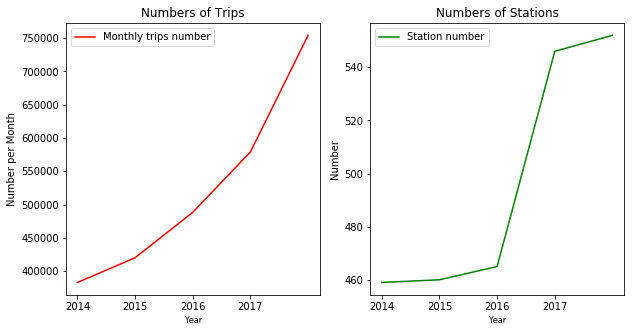

In [29]:
y_trip_counts = data.Year.value_counts()
f, axes = plt.subplots(1, 2, figsize=(10,5))
Used_number = [y_trip_counts[2014]/8, y_trip_counts[2015]/8, y_trip_counts[2016]/8, y_trip_counts[2017]/8,y_trip_counts[2018]/5]
Station_number = [len(station2014), len(station2015), len(station2016), len(station2017),len(station2018)]
labels = ['2014','2015','2016','2017']
x = range(4)
plt.sca(axes[0])
plt.plot(Used_number, color = 'r', label = 'Monthly trips number')
plt.title('Number of Trips')
plt.xticks(x, labels)
plt.ylabel('Number per Month')
plt.xlabel('Year', fontsize=8)
plt.legend(loc=2, prop={'size': 10})
plt.sca(axes[1])
plt.plot(Station_number, color = 'g', label = 'Stations number')
plt.title('Number of Stations')
plt.xticks(x, labels)
plt.ylabel('Number')
plt.xlabel('Year', fontsize=8)
plt.legend(loc=2, prop={'size': 10})
plt.show()

It seems like the network witnessed an important upgrade in 2017 since the number of stations considerably increased. In general, both trips and stations numbers are increasing. <br>
_Note that I plotted the monthly counts of trips since 2018 only extends to August_.

### Yearly trip distribution

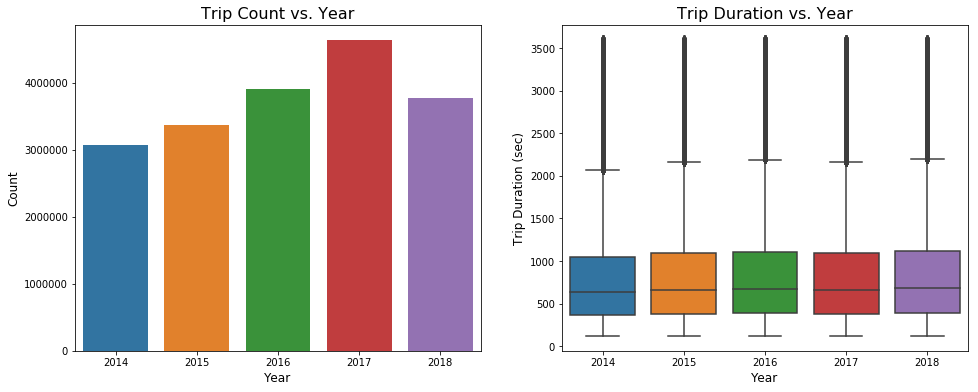

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='Year', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='Year', y='duration_sec', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Year', fontsize=16)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Trip Duration (sec)', fontsize=12)
plt.show()

_Again, the count did not decrease in 2018, it's just that the data for 2018 only extends to August for time of preparing this notebook_

### Monthly trip distribution

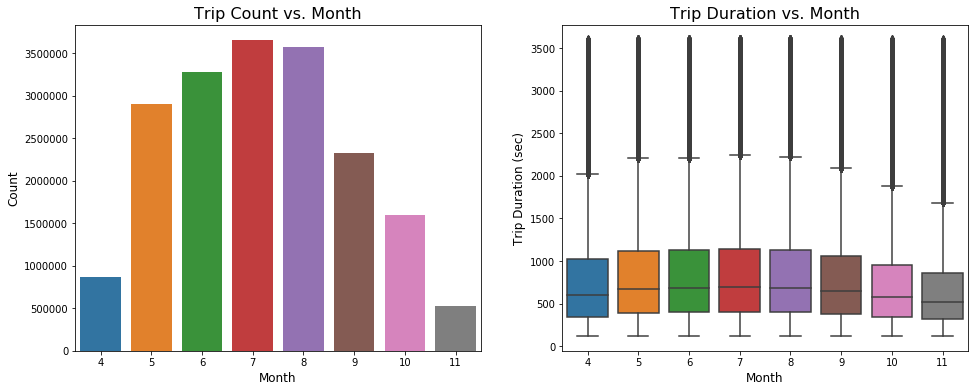

In [4]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='Month', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='Month', y='duration_sec', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (sec)', fontsize=12)
plt.show()

We can see that April and November have considerably lower numbers of trips counts and durations, which is to be expected due to the cod weather during this months in Montreal

### Day of the week trip distribution

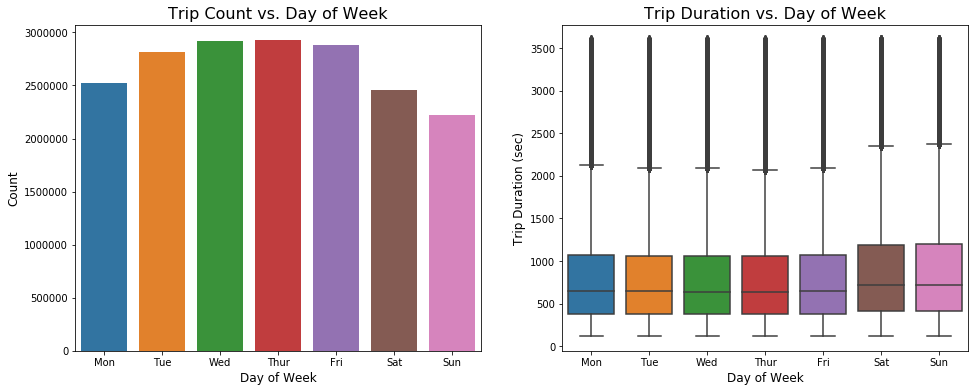

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='Day', data=data, ax=ax[0])
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[0].set_title('Trip Count vs. Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='Day', y='duration_sec', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=12)
ax[1].set_ylabel('Trip Duration (sec)', fontsize=12)
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

We constate that demand is higher during weekdays while trip duration is higher during weekends

### Trip distribution / Hour

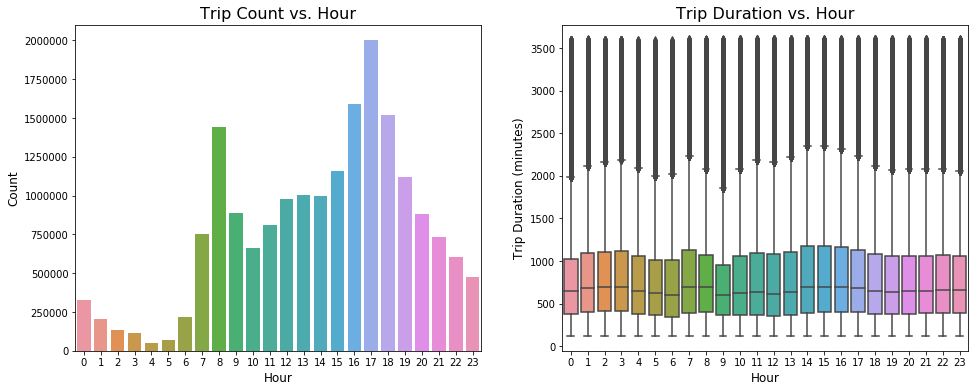

In [6]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='Hour', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Hour', fontsize=16)
ax[0].set_xlabel('Hour', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='Hour', y='duration_sec', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Hour', fontsize=16)
ax[1].set_xlabel('Hour', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

Observation: During rush hours (~8:00 am and ~5:00 pm), there is an increasing demand for sharing bikes

### Heatmap of trip count vs. (day and hour)


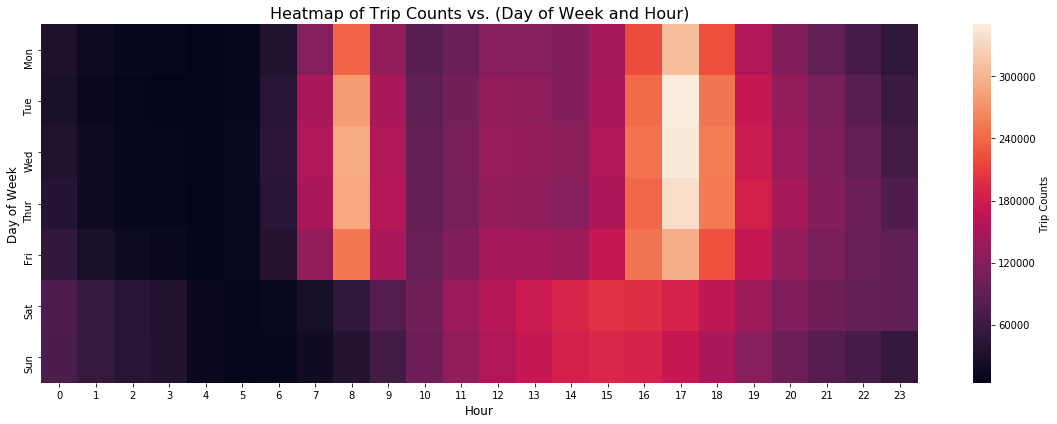

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
tmp = data[['Day', 'Hour', 'duration_sec']].groupby(['Day', 'Hour']).count().reset_index()
pivots = tmp.pivot('Day', 'Hour', 'duration_sec')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Heatmap of Trip Counts vs. (Day of Week and Hour)', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

The increase of demand during rush hours (~8:00 am and ~5:00 pm) happens during weekdays, but on weekends, there is no such clear trend.

### Trip duration distribution


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


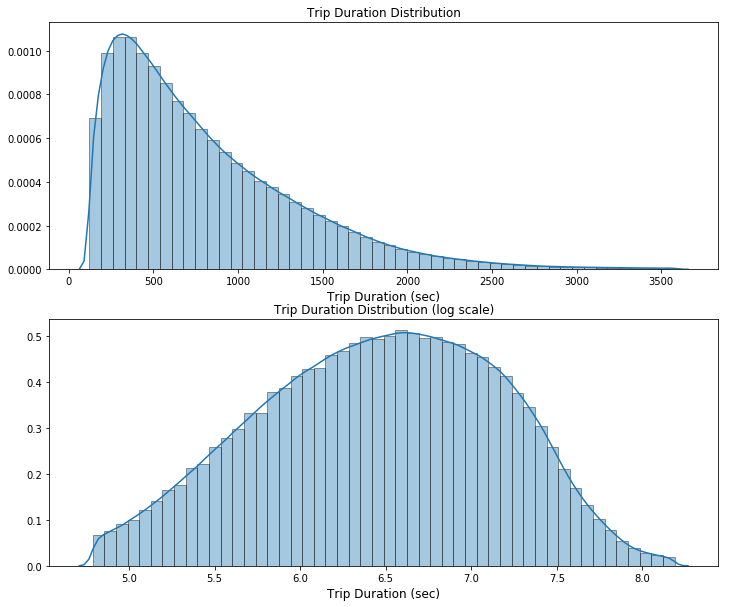

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.distplot(data['duration_sec'], ax=ax[0], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[0].set_xlabel('Trip Duration (sec)', fontsize=12)
ax[0].set_title('Trip Duration Distribution')

sns.distplot(np.log(data['duration_sec']), ax=ax[1], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[1].set_xlabel('Trip Duration (sec)', fontsize=12)
ax[1].set_title('Trip Duration Distribution (log scale)')
plt.show()

### Trip distribution vs weather condition


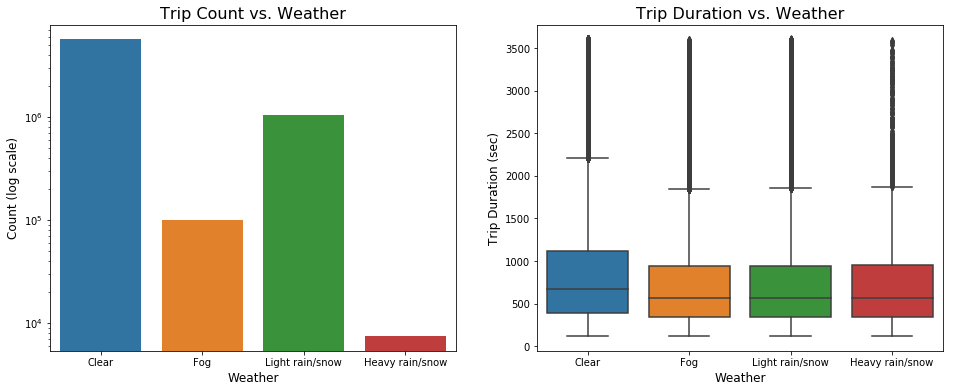

In [17]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='Weather_code', data=data, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. Weather', fontsize=16)
ax[0].set_xlabel('Weather', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)
ax[0].set_xticklabels(('Clear', 'Fog', 'Light rain/snow', 'Heavy rain/snow'))

sns.boxplot(x='Weather_code', y='duration_sec', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Weather', fontsize=16)
ax[1].set_xlabel('Weather', fontsize=12)
ax[1].set_ylabel('Trip Duration (sec)', fontsize=12)
ax[1].set_xticklabels(('Clear', 'Fog', 'Light rain/snow', 'Heavy rain/snow'))

plt.show()

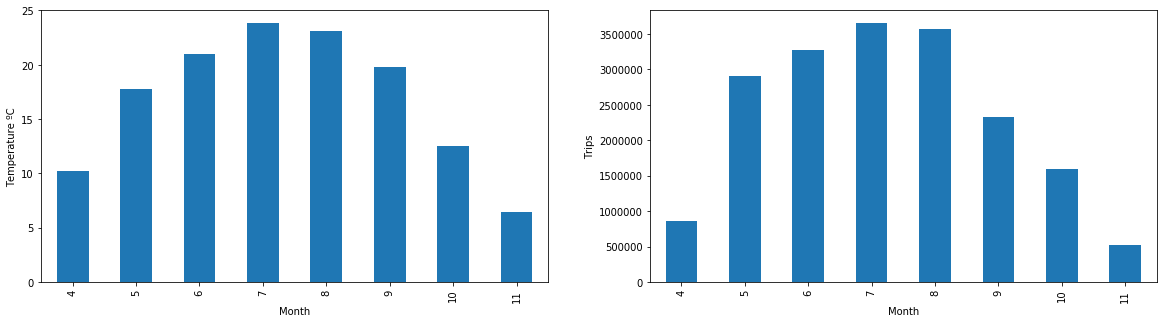

In [33]:
plt.figure(figsize=(20,5));
plt.subplot(1,2,1);
(data.groupby('Month').mean()['Temp (°C)']).plot(kind='bar',color='#1f77b4');
plt.ylabel('Temperature ºC');
plt.xlabel('Month');

plt.subplot(1,2,2);
(data.groupby('Month').count()['Temp (°C)']).plot(kind='bar',color='#1f77b4');
plt.xlabel('Month');
plt.ylabel('Trips');

Representing number of trips per month and the average temperature in that month, a close relationship is observed (confirmed).

### Geography of the trips

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


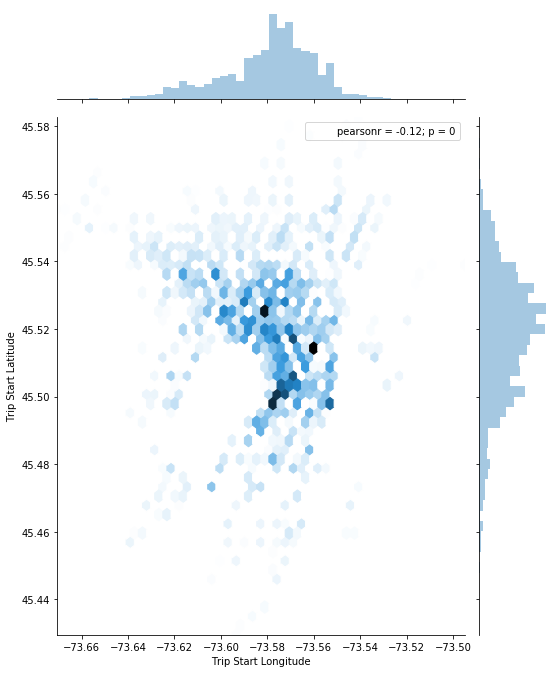

In [55]:
# trip start longitude and latitude distribution
g = sns.jointplot('longitude_start', 'latitude_start', data=data, kind='hex')
g.set_axis_labels('Trip Start Longitude', 'Trip Start Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


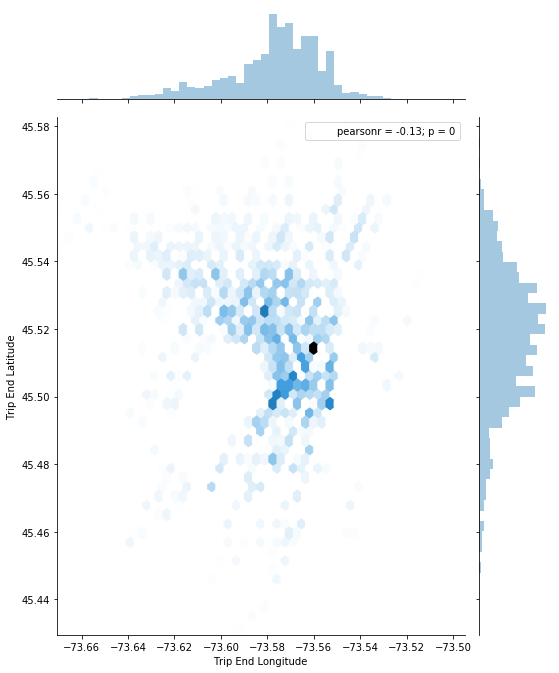

In [56]:
# trip end longitude and latitude distribution
g = sns.jointplot('longitude_end', 'latitude_end', data=data, kind='hex')
g.set_axis_labels('Trip End Longitude', 'Trip End Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

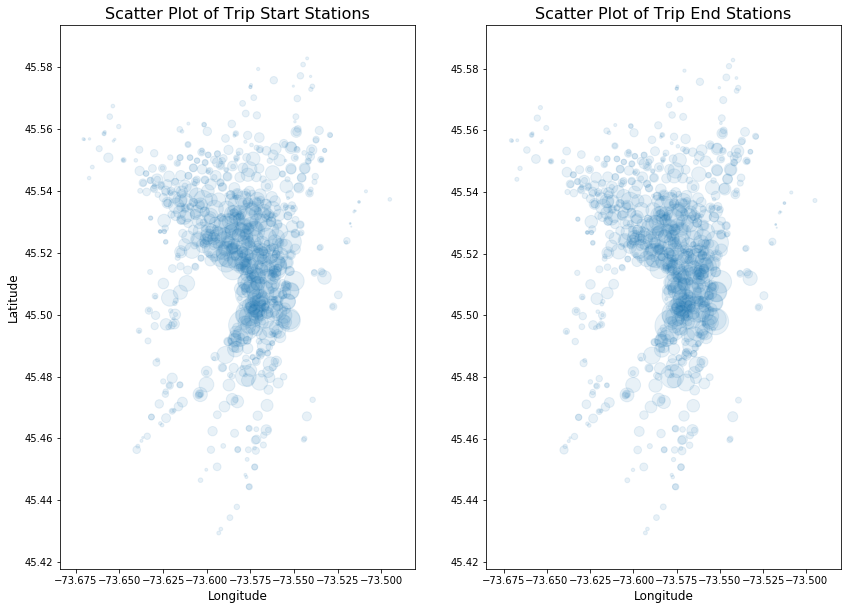

In [57]:
# group station according GPS locations
station_start = data[['longitude_start', 'latitude_start', 'duration_sec']]
station_start = station_start.groupby(['longitude_start', 'latitude_start'])
station_start = station_start.count().reset_index()

station_end = data[['longitude_end', 'latitude_end', 'duration_sec']]
station_end = station_end.groupby(['longitude_end', 'latitude_end'])
station_end = station_end.count().reset_index()

# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
x = station_start['longitude_start']
y = station_start['latitude_start']
s = station_start['duration_sec'] / 200
ax[0].scatter(x, y, s=s, alpha=0.1)
ax[0].set_title('Scatter Plot of Trip Start Stations', fontsize=16)
ax[0].set_xlabel('Longitude', fontsize=12)
ax[0].set_ylabel('Latitude', fontsize=12)

x = station_end['longitude_end']
y = station_end['latitude_end']
s = station_end['duration_sec'] / 200
ax[1].scatter(x, y, s=s, alpha=0.1)
ax[1].set_title('Scatter Plot of Trip End Stations', fontsize=16)
ax[1].set_xlabel('Longitude', fontsize=12)

plt.show()

Most bikes are being used downtown.